In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import sys
from time import time
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
print "Success"

Success


In [4]:
data = pd.read_csv("./train1.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
ID      1500 non-null object
AP1     1500 non-null int64
AP2     1500 non-null int64
AP3     1500 non-null int64
AP4     1500 non-null int64
AP5     1500 non-null int64
AP6     1500 non-null int64
AP7     1500 non-null int64
ROOM    1500 non-null int64
dtypes: int64(8), object(1)
memory usage: 105.5+ KB


In [6]:
data.head()

,ID,AP1,AP2,AP3,AP4,AP5,AP6,AP7,ROOM
0,ID_1,-64,-56,-61,-66,-71,-82,-81,1
1,ID_2,-68,-57,-61,-65,-71,-85,-85,1
2,ID_3,-63,-60,-60,-67,-76,-85,-84,1
3,ID_4,-61,-60,-68,-62,-77,-90,-80,1
4,ID_5,-63,-65,-60,-63,-77,-81,-87,1


In [4]:
data.describe()

,AP1,AP2,AP3,AP4,AP5,AP6,AP7,ROOM
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-52.319333,-55.95800,-55.319333,-53.800667,-62.905333,-81.188000,-81.973333,2.500000
std,11.672883,3.37834,5.132666,11.732435,9.127024,6.679002,6.676002,1.118407
min,-74.000000,-74.00000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.00000,-58.250000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.00000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-54.00000,-52.000000,-47.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-46.00000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [5]:
data.shape

(1500, 9)

In [8]:
data.corr(method='pearson')

,AP1,AP2,AP3,AP4,AP5,AP6,AP7,ROOM
AP1,1.000000,-0.025001,0.008173,0.923140,-0.264992,0.719425,0.681010,-0.084136
AP2,-0.025001,1.000000,0.266312,-0.015241,0.171894,0.064655,0.037988,0.116089
AP3,0.008173,0.266312,1.000000,0.047409,0.598848,-0.106953,-0.090573,0.663055
AP4,0.923140,-0.015241,0.047409,1.000000,-0.251789,0.701984,0.667914,-0.051578
AP5,-0.264992,0.171894,0.598848,-0.251789,1.000000,-0.424032,-0.366804,0.813521
AP6,0.719425,0.064655,-0.106953,0.701984,-0.424032,1.000000,0.726351,-0.368125
AP7,0.681010,0.037988,-0.090573,0.667914,-0.366804,0.726351,1.000000,-0.315843
ROOM,-0.084136,0.116089,0.663055,-0.051578,0.813521,-0.368125,-0.315843,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6130183810>,
      dtype=object)

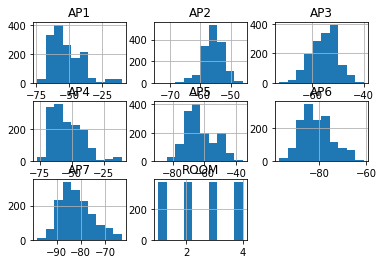

In [7]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60eeb83890>,
      dtype=object)

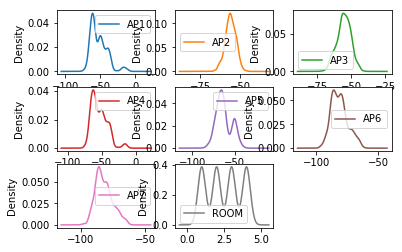

In [8]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

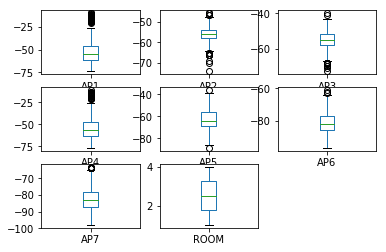

In [9]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

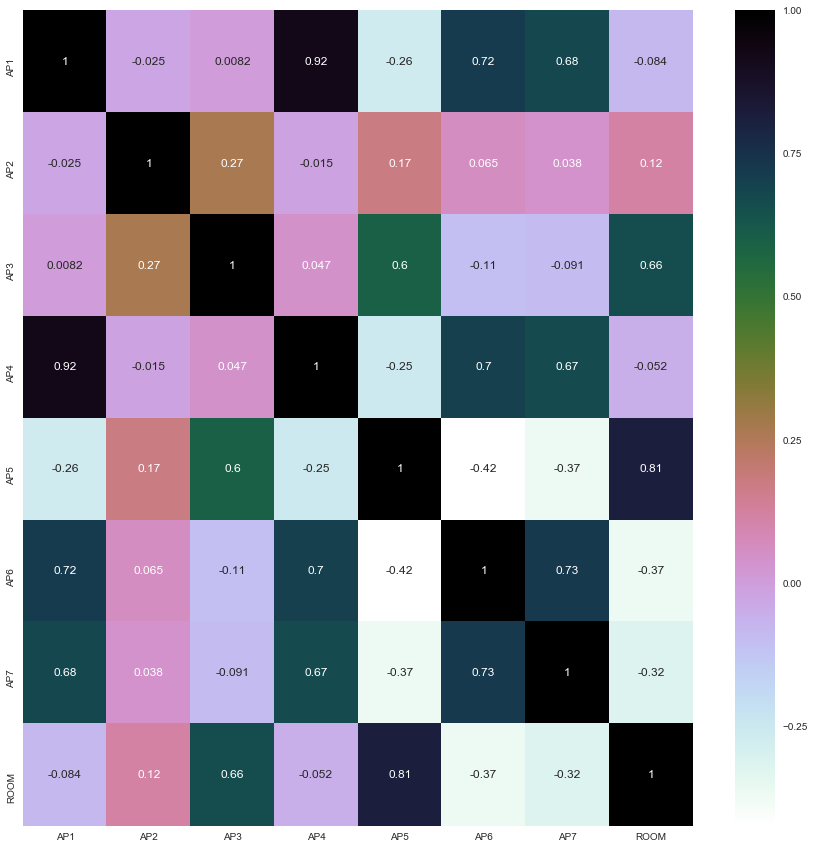

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)
plt.figure(figsize=(15,15)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


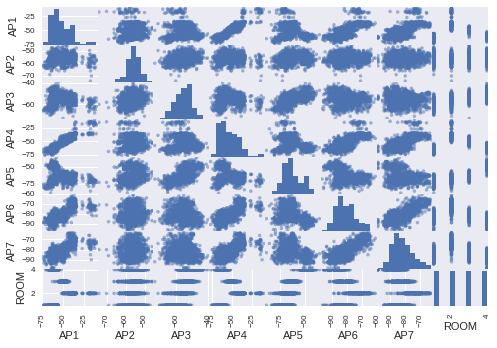

In [15]:
scatter_matrix(data)
plt.show()

In [11]:

features = data[used_features]
labels = data["ROOM"]

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)


NameError: name 'used_features' is not defined

In [0]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e5,solver='lbfgs',max_iter=1000,multi_class='multinomial')
clf.fit(features_train,labels_train)
print clf.score(features_test,labels_test)

0.98


In [0]:
test = pd.read_csv("./test1.csv")
test_features = test[used_features]
id = test["ID"]

clf.fit(features,labels)
res=clf.predict(test_features)

df = pd.DataFrame(data={"Room": res,"Id": id})
df.to_csv("./out.csv", sep=',',index=False)